In [2]:
# Importing libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_recall_curve

In [3]:
# Importing and pre-processing data

data = pd.read_csv('train.csv')

# Dropping irrelevant features

useless_features = ['state', 'area_code']
data.drop(useless_features, axis = 1, inplace= True)

x = data.drop('churn', axis = 1)
y = data['churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Handling string data - 'yes'/'no'

dict = {'yes' : 1, 'no' : 0}

x_train['international_plan'] = x_train['international_plan'].replace(dict)
x_train['voice_mail_plan'] = x_train['voice_mail_plan'].replace(dict)

x_test['international_plan'] = x_test['international_plan'].replace(dict)
x_test['voice_mail_plan'] = x_test['voice_mail_plan'].replace(dict)


In [4]:
# Training PCA model to reduce the dimensions by 3 times

pca = PCA(n_components = 5)
pca.fit(x_train)

PCA(n_components=5)

In [5]:
# Transforming the training and testing data

x_train_reduced = pca.transform(x_train)
x_test_reduced = pca.transform(x_test)

In [6]:
# Training logistic regression model

model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

# Indicating importance of individual features in classification

model_fi = permutation_importance(model, x_train, y_train)
model_fi['importances_mean']

array([ 1.00000000e-03,  1.70000000e-02,  1.97647059e-02,  3.41176471e-03,
        2.30000000e-02,  6.47058824e-04, -1.17647059e-04,  3.58823529e-03,
        1.64705882e-03,  7.64705882e-04,  2.05882353e-03,  5.88235294e-05,
        7.64705882e-04,  2.82352941e-03,  2.47058824e-03,  5.29411765e-04,
        5.23529412e-03])

In [7]:
from sklearn.utils.multiclass import type_of_target
#Testing the logistic regression model
pred = model.predict(x_test)
print("Confusion Matrix : ")
print(confusion_matrix(pred, y_test))
print("Accuracy : ", accuracy_score(pred, y_test))
y_test=np.array(y_test)
y_test_binary=[]
y_pred_binary=[]
for i in range(len(y_test)):
 if(y_test[i]=='no'):
   y_test_binary.append(0)
 else:
    y_test_binary.append(1)
 if(pred[i]=='no'):
   y_pred_binary.append(0)
 else:
    y_pred_binary.append(1)

Confusion Matrix : 
[[723  92]
 [ 12  23]]
Accuracy :  0.8776470588235294


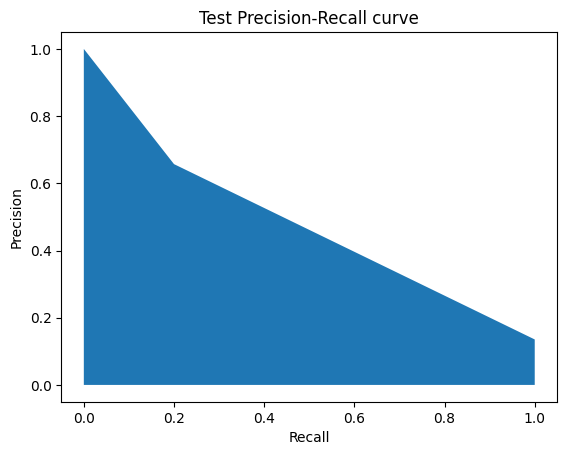

In [12]:
#precision-recall curve for test data

precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_binary)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Test Precision-Recall curve");
